# Modelado inverso de ERT

## Caso 3

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pygimli as pg
from pygimli.physics import ert
import pandas as pd
import seaborn as sns

In [3]:
data = ert.load("datos_tre/Datos_reales_3.dat")

In [4]:
print(data)

Data: Sensors: 64 data: 4067, nonzero entries: ['a', 'b', 'm', 'n', 'r', 'valid']


In [6]:
data["k"] = ert.geometricFactors(data)

In [9]:
data["k"]

4067 [-33416.06562779506,...,6541.203845052005]

In [7]:
data["rhoa"] = data("r") * data("k") 

In [10]:
data["rhoa"]

4067 [731.9087438390325,...,693.5769260985542]

In [17]:
data["err"] = ert.estimateError(data, relativeError=0.02, absoluteError=5e-6)

In [18]:
data["err"]

4067 [0.020000006831452748,...,0.02000000720900568]

(<Axes: >, <matplotlib.colorbar.Colorbar at 0x21effda83d0>)

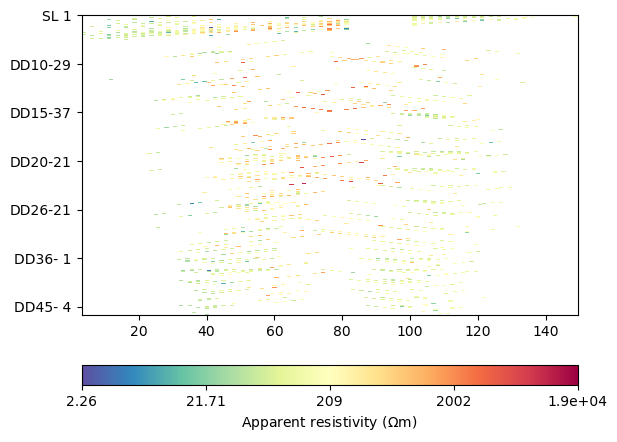

In [19]:
ert.show(data)

In [20]:
mgr1 = ert.ERTManager(data, verbose=True)

In [21]:
inv1 = mgr1.invert(verbose=True)

08/02/24 - 20:35:45 - pyGIMLi - INFO - Found 2 regions.
08/02/24 - 20:35:45 - pyGIMLi - INFO - (ERTModelling) Region with smallest marker (1) set to background.
08/02/24 - 20:35:45 - pyGIMLi - INFO - Found 2 regions.
08/02/24 - 20:35:45 - pyGIMLi - INFO - (ERTModelling) Region with smallest marker (1) set to background.
08/02/24 - 20:35:45 - pyGIMLi - INFO - Creating forward mesh from region infos.
08/02/24 - 20:35:45 - pyGIMLi - INFO - Creating refined mesh (H2) to solve forward task.
08/02/24 - 20:35:45 - pyGIMLi - INFO - Mesh for forward task: Mesh: Nodes: 2726 Cells: 5116 Boundaries: 4004
08/02/24 - 20:35:45 - pyGIMLi - INFO - Use median(data values)=114.60647194787046
08/02/24 - 20:35:45 - pyGIMLi - INFO - Created startmodel from forward operator: 1017, min/max=114.606472/114.606472
08/02/24 - 20:35:45 - pyGIMLi - INFO - Starting inversion.


fop: <pygimli.physics.ert.ertModelling.ERTModelling object at 0x0000021EFFB85770>
Data transformation: <pgcore._pygimli_.RTransLogLU object at 0x0000021EFFB85EF0>
Model transformation: <pgcore._pygimli_.RTransLog object at 0x0000021EFFB85DB0>
min/max (data): 2.26/1.9e+04
min/max (error): 2%/2%
min/max (start model): 115/115
--------------------------------------------------------------------------------
inv.iter 0 ... chi² = 3724.95
--------------------------------------------------------------------------------
inv.iter 1 ... chi² = 3045.03 (dPhi = 18.24%) lam: 20.0
--------------------------------------------------------------------------------
inv.iter 2 ... chi² = 2609.71 (dPhi = 14.27%) lam: 20.0
--------------------------------------------------------------------------------
inv.iter 3 ... chi² = 2387.54 (dPhi = 8.48%) lam: 20.0
--------------------------------------------------------------------------------
inv.iter 4 ... chi² = 2210.25 (dPhi = 7.39%) lam: 20.0
-----------------

(1440.0, 1490.006104)

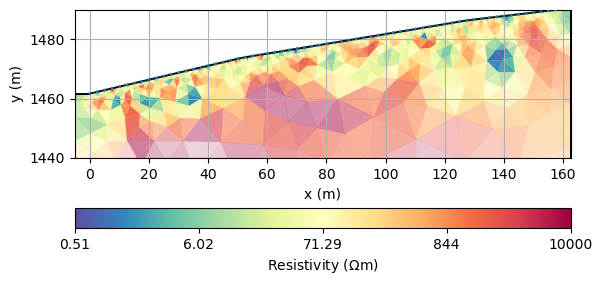

In [52]:
kw = dict(logScale=True, cMap="Spectral_r", xlabel="x (m)", ylabel="y (m)", cMin=0, cMax=10000) #cMin y cMax son los valores mínimos y máximos de la barra de colores
ax, cb = mgr1.showResult(**kw)
ax.grid(True)
ax.set_ylim([1440, ax.get_ylim()[1]]) #esto es para que el eje 'y' empiece en -10

### Control de calidad (QC)

<Axes: ylabel='Count'>

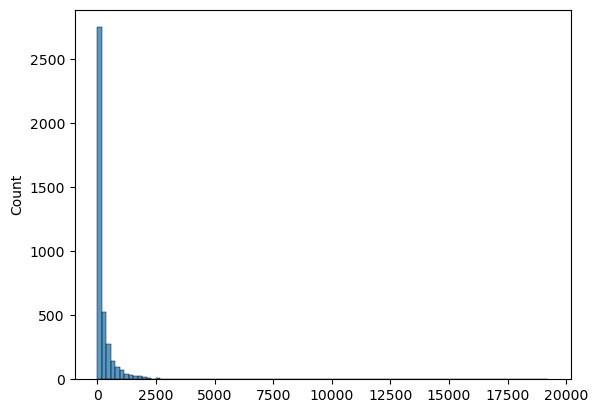

In [30]:
sns.histplot(data["rhoa"], bins = 100)

In [28]:
data_array = np.array(data["rhoa"])

In [29]:
data_series = pd.Series(data_array)

In [31]:
quantile_99 = data_series.quantile(0.99)

In [32]:
quantile_99

2672.0457643809245

In [35]:
quantile_1 = data_series.quantile(0.01)

In [36]:
quantile_1

12.445461309791014

In [33]:
data.remove(data["rhoa"] > quantile_99)

(<Axes: >, <matplotlib.colorbar.Colorbar at 0x21effe663d0>)

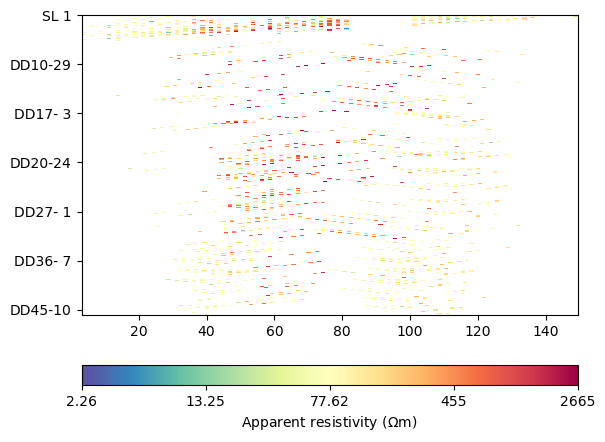

In [34]:
ert.show(data)

In [ ]:
print(data)

In [37]:
mgr2 = ert.ERTManager(data)

In [38]:
inv2 = mgr2.invert(verbose=True)

08/02/24 - 20:47:59 - pyGIMLi - INFO - Found 2 regions.
08/02/24 - 20:47:59 - pyGIMLi - INFO - (ERTModelling) Region with smallest marker (1) set to background.
08/02/24 - 20:47:59 - pyGIMLi - INFO - Found 2 regions.
08/02/24 - 20:47:59 - pyGIMLi - INFO - (ERTModelling) Region with smallest marker (1) set to background.
08/02/24 - 20:47:59 - pyGIMLi - INFO - Creating forward mesh from region infos.
08/02/24 - 20:47:59 - pyGIMLi - INFO - Creating refined mesh (H2) to solve forward task.
08/02/24 - 20:47:59 - pyGIMLi - INFO - Mesh for forward task: Mesh: Nodes: 2726 Cells: 5116 Boundaries: 4004
08/02/24 - 20:47:59 - pyGIMLi - INFO - Use median(data values)=112.31912012686291
08/02/24 - 20:47:59 - pyGIMLi - INFO - Created startmodel from forward operator: 1017, min/max=112.319120/112.319120
08/02/24 - 20:47:59 - pyGIMLi - INFO - Starting inversion.


fop: <pygimli.physics.ert.ertModelling.ERTModelling object at 0x0000021ECE376680>
Data transformation: <pgcore._pygimli_.RTransLogLU object at 0x0000021ECE3767C0>
Model transformation: <pgcore._pygimli_.RTransLog object at 0x0000021ECE376720>
min/max (data): 2.26/2665
min/max (error): 2%/2%
min/max (start model): 112/112
--------------------------------------------------------------------------------
inv.iter 0 ... chi² = 3499.70
--------------------------------------------------------------------------------
inv.iter 1 ... chi² = 2818.04 (dPhi = 19.47%) lam: 20.0
--------------------------------------------------------------------------------
inv.iter 2 ... chi² = 2415.56 (dPhi = 14.25%) lam: 20.0
--------------------------------------------------------------------------------
inv.iter 3 ... chi² = 2207.84 (dPhi = 8.57%) lam: 20.0
--------------------------------------------------------------------------------
inv.iter 4 ... chi² = 2018.91 (dPhi = 8.51%) lam: 20.0
--------------------

<Axes: ylabel='Count'>

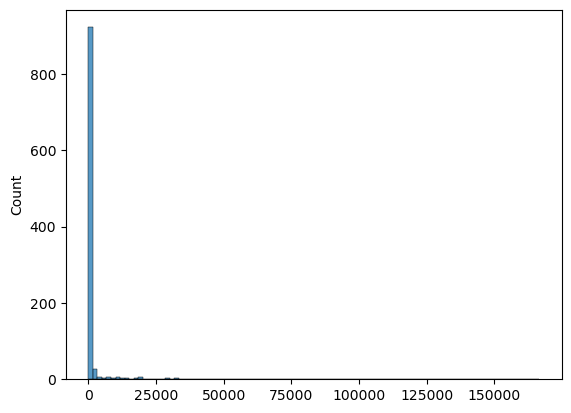

In [41]:
sns.histplot(inv2, bins = 100)

In [44]:
inv_array = np.array(inv2)

In [45]:
inv_series = pd.Series(inv_array)

In [46]:
quantile_99_inv = inv_series.quantile(0.99)

In [47]:
quantile_99_inv

57785.04919027479

In [49]:
quantile_95_inv = inv_series.quantile(0.95)

In [50]:
quantile_95_inv

9401.583579279457

(1440.0, 1490.006104)

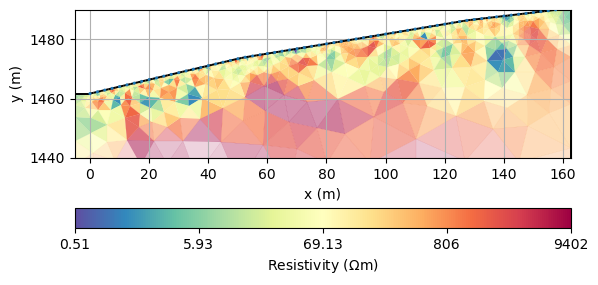

In [54]:
kw = dict(logScale=True, cMap="Spectral_r", xlabel="x (m)", ylabel="y (m)", cMin=0, cMax=quantile_95_inv) #cMin y cMax son los valores mínimos y máximos de la barra de colores
ax, cb = mgr1.showResult(**kw)
ax.grid(True)
ax.set_ylim([1440, ax.get_ylim()[1]]) #esto es para que el eje 'y' empiece en -10